Trước hết chúng ta tạo một tập dữ liệu được chia vào 03 phân lớp khác nhau trong không gian d =2 chiều
(để có thể hiển thị ra mặt phẳng). Các phân lớp sẽ được tạo sao cho không có hai phân lớp nào là tách được
tuyến tính (linearly separable). Đoạn lệnh dưới đây để tạo dữ liệu theo ý tưởng như vậy:

In [2]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

Trong đoạn lệnh trên, ta đã tạo dữ liệu (là các điểm – 2 chiều) bằng cách tạo các điểm theo tọa độ cực: từ
một tâm điểm, ta vừa tăng dần bán kính r, đồng thời tăng dần góc t theo chỉ số của điểm, dẫn đến các điểm

sẽ được phân bố xa dần tâm và tạo thành vệt xoáy. Ngoài ra ta bổ sung yếu tố ngẫu nhiên
np.random.randn(N)*0.2 để tọa độ các điểm có sự xê dịch xung quanh vệt xoáy.
Đoạn chương trình dưới đây sẽ vẽ các điểm để ta có thể quan sát trực quan:

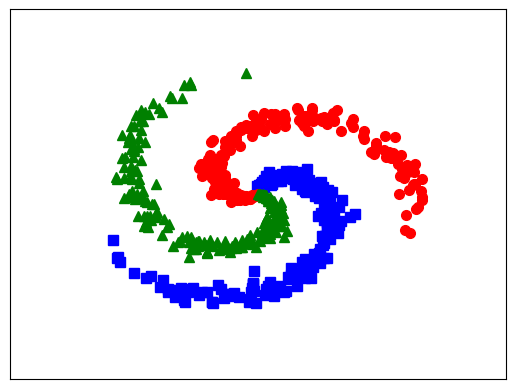

In [3]:
# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

Do ở đây dữ liệu không tách được tuyến tính, nên chúng ta không thể sử dụng phương pháp hồi quy Softmax.
Dưới đây chúng ta sử dụng một kiến trúc mạng ANN với 01 tầng ẩn bổ sung (tức số Layer L = 2), và ở tầng
đầu ra (output) chúng ta sử dụng hàm kích hoạt là SoftMax, do đây là bài toán phân loại nhiều lớp.

Chúng ta bắt đầu với việc xây dựng các hàm cơ sở như Softmax

In [4]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

Tiếp theo chúng ta xây dựng hàm tổn thất, ở đây được tính theo công thức ứng với trường hợp phân loại
nhiều lớp bằng softmax:

Đoạn chương trình xây dựng hàm tổn thất như sau:

In [5]:
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

Tiếp theo, chúng ta chuyển đầu ra Y từ dạng số nguyên trong tập {1, 2, ..., C} - ứng với C classes – sang
dạng onehot-coding, tức là vector C thành phần, nếu Y thuộc lớp thứ c thì tọa độ thứ c tương ứng là 1, các
tọa độ khác là 0:

In [6]:
## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

Tiếp theo ta khởi tạo các giá trị cho bộ trọng số và các số kiến trúc mạng. Ở đây ta sẽ bổ sung 01 tầng hidden
với số units của tầng này là 100. Các bạn có thể tăng hoặc giảm con số này và quan sát kết quả. Ở tầng đầu
ra, chúng ta cần vector 03 thành phần là xác suất để điểm tương ứng rơi vào một trong các lớp 0, 1, 2 (thay
cho 1, 2, 3). Vậy số chiều của các tầng trong mạng ANN sẽ là: d0 = 2 (tầng input); d1 = 100 (tầng hidden)
và d2 = 3 (tầng output). Đoạn lệnh khởi tạo như sau:

In [16]:
d0 = 2
d1 = h = 100 # size of hidden layer

d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
print(W1.shape)
print(X.shape)

(2, 100)
(2, 600)


In [19]:
for i in range(1):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    print(Z1.shape)
    A1 = np.maximum(Z1, 0)
    print(A1.shape)
    Z2 = np.dot(W2.T, A1) + b2
    print(Z1.shape)
    Yhat = softmax(Z2)
    print(Yhat.shape)

(100, 600)
(100, 600)
(100, 600)
(3, 600)


Tiếp theo là đoạn chương trình thực hiện thuật toán lặp theo phương pháp Gradient Descent

In [17]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2
    
print(Y.shape)
print(Yhat.shape)

iter 0, loss: 1.098548
iter 1000, loss: 0.172657
iter 2000, loss: 0.048274
iter 3000, loss: 0.032161
iter 4000, loss: 0.025922
iter 5000, loss: 0.022385
iter 6000, loss: 0.020113
iter 7000, loss: 0.018501
iter 8000, loss: 0.017292
iter 9000, loss: 0.016329
(3, 600)
(3, 600)


Dưới đây chúng ta tính độ chính xác cho trường hợp áp dụng lên chính dữ liệu training

In [9]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


Đoạn chương trình dưới đây thực hiện việc vẽ dữ liệu cùng với đường phân cách để ta có thể quan sát kết
quả một cách trực quan:

(1, 14400)
200


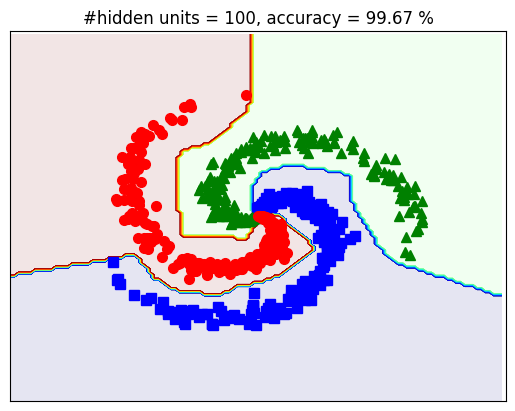

In [11]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 200
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Tải dữ liệu về hoa Iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=100,max_iter=1000,random_state=42)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác: {}".format(accuracy))

Độ chính xác: 1.0
